In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

### Q1 Data Imbalance Problem (40%)

#### (a) 試在該數據分析流程中加入數據平衡的步驟，使用三種方法來進行數據平衡 (e.g. 使用上抽樣、下抽樣或是代價敏感學習等 )。(15%) 
- 原比例為 14:1，三種方法統一調整至 4:1。

In [2]:
# load data
df = pd.read_excel(open('MDS_Assignment4_SECOM.xlsx', 'rb'), sheet_name='secom', index_col=0)
df.head(3)

,Sensor_1,Sensor_2,Sensor_3,Sensor_4,Sensor_5,Sensor_6,Sensor_7,Sensor_8,Sensor_9,Sensor_10,...,Sensor_583,Sensor_584,Sensor_585,Sensor_586,Sensor_587,Sensor_588,Sensor_589,Sensor_590,Label,Time
1,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1,19/07/2008 11:55:00
2,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1,19/07/2008 12:32:00
3,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1,19/07/2008 13:17:00


In [3]:
df = df.drop('Time', axis=1)

In [4]:
# df.isnull().sum() # many
df = df.fillna(df.mean())
df['Label'].value_counts()

-1    1463
 1     104
Name: Label, dtype: int64

In [5]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1:]
print(X.shape, y.shape)

(1567, 590) (1567, 1)


In [6]:
# 1) over sampling：對少數群進行取後放回的重複隨機抽樣 以增加少數群的樣本數。SMOTE
# 少數類別學得不錯
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

print('Original dataset shape %s' % Counter(y['Label']))

sm = SMOTE(sampling_strategy=1/4, random_state=42)
X_res, y_res = sm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res['Label']))
# y_res = y_res['Label']
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res['Label'], test_size=0.33, random_state=42)

clf = RandomForestClassifier(max_depth=10, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('train acc:', clf.score(X_train, y_train))
print(classification_report(y_test, y_pred, target_names=['class -1', 'class 1'])) # print test result

Original dataset shape Counter({-1: 1463, 1: 104})
Resampled dataset shape Counter({-1: 1463, 1: 365})
train acc: 1.0
              precision    recall  f1-score   support

    class -1       0.91      1.00      0.95       487
     class 1       0.97      0.58      0.73       117

    accuracy                           0.92       604
   macro avg       0.94      0.79      0.84       604
weighted avg       0.92      0.92      0.91       604



In [31]:
# 2) under sampling：對多數群進行隨機抽樣 以減少多數群的樣本數 。Random、Tomek link
# 很明顯學不到少數類別
from imblearn.under_sampling import RandomUnderSampler
print('Original dataset shape %s' % Counter(y['Label']))

rus = RandomUnderSampler(sampling_strategy=1/4, random_state=0)
X_res, y_res = rus.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res['Label']))
# y_res = y_res['Label']
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res['Label'], test_size=0.33, random_state=42)

clf = RandomForestClassifier(max_depth=10, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('train acc:', clf.score(X_train, y_train))
print(classification_report(y_test, y_pred, target_names=['class -1', 'class 1'])) # print test result

Original dataset shape Counter({-1: 1463, 1: 104})
Resampled dataset shape Counter({-1: 416, 1: 104})
train acc: 0.9885057471264368
              precision    recall  f1-score   support

    class -1       0.78      1.00      0.88       134
     class 1       0.00      0.00      0.00        38

    accuracy                           0.78       172
   macro avg       0.39      0.50      0.44       172
weighted avg       0.61      0.78      0.68       172



c:\Users\luweb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\luweb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\luweb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [30]:
# 3) cost sensitive、one class

print('Original dataset shape %s' % Counter(y['Label']))
print('class_weight={-1:1,1:5}')
X_train, X_test, y_train, y_test = train_test_split(X, y['Label'], test_size=0.33, random_state=42)

clf = RandomForestClassifier(max_depth=5, random_state=0, class_weight={-1:1,1:5})
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('train acc:', clf.score(X_train, y_train))
print(classification_report(y_test, y_pred, target_names=['class -1', 'class 1'])) # print test result

Original dataset shape Counter({-1: 1463, 1: 104})
class_weight={-1:1,1:5}
train acc: 0.9599618684461392
              precision    recall  f1-score   support

    class -1       0.94      1.00      0.97       486
     class 1       0.00      0.00      0.00        32

    accuracy                           0.94       518
   macro avg       0.47      0.50      0.48       518
weighted avg       0.88      0.94      0.91       518



c:\Users\luweb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\luweb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\luweb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

#### (b) (5%) 建 議選用哪種方法最為合適？為什麼？

建議選用"over sampling"方法，我固定模型參數和樣本比例，從實驗結果得出，只有over sampling的實驗組的testing data能預測出少數類別，precision 97%, recall 58%，表現已經不錯了，另外兩種方法皆無法預測出少數類別。可以判斷說是，原始資料集的少數樣本太少了，無法讓模型學到特徵，若不實際增加樣本數，則無任何數據面的幫助。

#### (c) (10%) 
對於數據多數群與少數群的比例應當調整至多少？為什麼？試透過調整生成比率
(i.e. 敏感度分析 )來看模型分類結果。 (提示：將敏感度分析以繪圖呈現兩條曲線， x軸為
不同生成比例、 y軸為偽陽性率 (false positive rate)與偽陰性率 (false negative rate))

In [46]:
# 從 1:13 ~ 1:1
from sklearn.metrics import confusion_matrix
tp_arr = []
fp_arr = []
sample_rate_arr = []
for i in range(13,1-1,-1):
    sample_rate = 1/i
    sm = SMOTE(sampling_strategy=1/i, random_state=42)
    X_res, y_res = sm.fit_resample(X, y)
    print('Resampled dataset shape %s' % Counter(y_res['Label']), end=' ')
    X_train, X_test, y_train, y_test = train_test_split(X_res, y_res['Label'], test_size=0.33, random_state=42)
    clf = RandomForestClassifier(max_depth=10, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    tp_rate = tp/(tp+fn) # 正樣本預測結果數/正樣本實際數
    fp_rate = 0 if fp == 0 else fp/(fp+tn) # 被預測為正的負樣本結果數/負樣本實際數
    tp_arr.append(tp_rate)
    fp_arr.append(fp_rate)
    sample_rate_arr.append(f'1:{i}')
    print('train acc:', clf.score(X_train, y_train))
    # print(classification_report(y_test, y_pred, target_names=['class -1', 'class 1'])) # print test result

Resampled dataset shape Counter({-1: 1463, 1: 112}) train acc: 0.95260663507109
Resampled dataset shape Counter({-1: 1463, 1: 121}) train acc: 0.9538171536286523
Resampled dataset shape Counter({-1: 1463, 1: 133}) train acc: 0.9588400374181478
Resampled dataset shape Counter({-1: 1463, 1: 146}) train acc: 0.9628942486085343
Resampled dataset shape Counter({-1: 1463, 1: 162}) train acc: 0.9586397058823529
Resampled dataset shape Counter({-1: 1463, 1: 182}) train acc: 0.9637023593466425
Resampled dataset shape Counter({-1: 1463, 1: 209}) train acc: 0.975
Resampled dataset shape Counter({-1: 1463, 1: 243}) train acc: 0.9860017497812773
Resampled dataset shape Counter({-1: 1463, 1: 292}) train acc: 0.9957446808510638
Resampled dataset shape Counter({-1: 1463, 1: 365}) train acc: 1.0
Resampled dataset shape Counter({-1: 1463, 1: 487}) train acc: 0.9992343032159265
Resampled dataset shape Counter({-1: 1463, 1: 731}) train acc: 1.0
Resampled dataset shape Counter({-1: 1463, 1: 1463}) train ac

由結果顯示，樣本越平均，測試資料集的 tp rate 越高，但也會換來 fp rate 慢慢的增長。

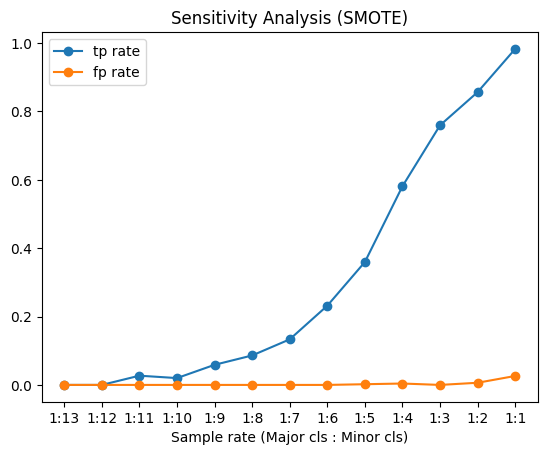

In [54]:
plt.figure()
plt.plot(tp_arr, label='tp rate', marker='o')
plt.plot(fp_arr, label='fp rate', marker='o')
plt.legend()
plt.xticks(list(range(len(sample_rate_arr))), sample_rate_arr)
plt.title('Sensitivity Analysis (SMOTE)')
plt.xlabel('Sample rate (Major cls : Minor cls)')
plt.show()

#### (d) (10%) 試說明特徵挑選步驟應於數據平衡 前或後 ，這對預測結果有何影響?

我們由 OSL 選出 pvalue < 0.01 的 14 個特徵，分別是 `['Sensor_60', 'Sensor_139', 'Sensor_253', 'Sensor_412', 'Sensor_133', 'Sensor_153', 'Sensor_391', 'Sensor_440', 'Sensor_3', 'Sensor_57', 'Sensor_288', 'Sensor_567', 'Sensor_41', 'Sensor_360']`。同樣的取這 14 個欄位進行一次 RF 作為實驗組。

由結果可得出，挑選重要變數後，少數類別的 f1-score 從原本的 0.73 降低為 0.64，recall 從 0.58 降低為 0.48，可見特徵挑選在此資料集不是很有效益，或許可以放寬挑選變數的 threshold 來挑選更多變數。也因為 DecesionTree 算法本身就有進行變數挑選的行為，我們不需特別再為它額外挑選重要變數。

In [10]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

data_X_const = sm.add_constant(X) # 做線性回歸前 要手動加上截距(常數項)
data_X_const = data_X_const.rename(columns={"const": "Intercept"})

model = sm.OLS(y, data_X_const)
osl_result = model.fit()
osl_pvalues = osl_result.pvalues

selected_attr = []
for index in osl_pvalues.sort_values().index:
  if osl_pvalues[index] < 0.01:
    selected_attr.append(index)
print("Selected:", len(selected_attr),'\n', selected_attr)

Selected: 14 
 ['Sensor_60', 'Sensor_139', 'Sensor_253', 'Sensor_412', 'Sensor_133', 'Sensor_153', 'Sensor_391', 'Sensor_440', 'Sensor_3', 'Sensor_57', 'Sensor_288', 'Sensor_567', 'Sensor_41', 'Sensor_360']


In [12]:
print('Original dataset shape %s' % Counter(y['Label']))

sm = SMOTE(sampling_strategy=1/4, random_state=42)
X_res, y_res = sm.fit_resample(X[selected_attr], y) # 只使用顯著的 14 個欄位
print('Resampled dataset shape %s' % Counter(y_res['Label']))
# y_res = y_res['Label']
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res['Label'], test_size=0.33, random_state=42)

clf = RandomForestClassifier(max_depth=10, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('train acc:', clf.score(X_train, y_train))
print(classification_report(y_test, y_pred, target_names=['class -1', 'class 1'])) # print test result

Original dataset shape Counter({-1: 1463, 1: 104})
Resampled dataset shape Counter({-1: 1463, 1: 365})
train acc: 0.9852941176470589
              precision    recall  f1-score   support

    class -1       0.89      1.00      0.94       487
     class 1       0.97      0.48      0.64       117

    accuracy                           0.90       604
   macro avg       0.93      0.74      0.79       604
weighted avg       0.90      0.90      0.88       604



### Q2 Meta heuristic algorithm (30%) 

本範例是一個具有20個工件的單機台 flow shop 問題，排程目標為最小化總加權延遲 (Total weighted tardiness) ，工件資訊如下圖所示
1. Initailization population
2. Select parents & Crossover
3. Mutate Offsprings
4. Merge parents and offsprings
5. Evalutate, Sort & Select population
6. Go to step 2

演算參考了
- Paper: Crossover and Mutation Strategies applied in Job Shop Scheduling Problems https://iopscience.iop.org/article/10.1088/1742-6596/1377/1/012031
- Github: https://github.com/wurmen/Genetic-Algorithm-for-Job-Shop-Scheduling-and-NSGA-II/blob/master/implementation%20with%20python/GA-jobshop/GA_For_Jobshop.md

In [112]:
import numpy as np
import time
import copy
import random
from collections import Counter
import matplotlib.pyplot as plt

In [107]:
def sequence_integrity_test(seq:list) -> bool:
    '''驗證序列是否為合法的工作序列(不重複) O(1)'''
    lenx = len(seq)
    correct_seq = list(range(lenx))
    assert Counter(seq) == Counter(correct_seq), seq
    return True

sequence_integrity_test([0,1,2,3,4]) # True
sequence_integrity_test([0,1,3,3,4]) # AssertionError (3重複了)

AssertionError: [0, 1, 3, 3, 4]

In [108]:
def PMX_crossover(parent1, parent2):
    # parent1 and parent2 are 1D np.array
    parent1,parent2 = np.array(parent1), np.array(parent2) 
    rng = np.random.default_rng(seed=111)

    cutoff_1, cutoff_2 = np.sort(rng.choice(np.arange(len(parent1)+1), size=2, replace=False))
    # cutoff_1, cutoff_2 = 2 , 7
    # print('cutoff_1, cutoff_2:', cutoff_1, cutoff_2)

    def PMX_one_offspring(p1, p2):
        offspring = np.zeros(len(p1), dtype=p1.dtype)
        
        # Copy the mapping section (middle) from parent1
        offspring[cutoff_1:cutoff_2] = p1[cutoff_1:cutoff_2]
        # print('---\np1:', p1,', p2:', p2)
        # print('elements copied from parent p1:', offspring)

        # copy the rest from parent2 (provided it's not already there
        for i in np.concatenate([np.arange(0,cutoff_1), np.arange(cutoff_2,len(p1))]):
            candidate = p2[i]
            while candidate in p1[cutoff_1:cutoff_2]: # allows for several successive mappings
                # print(f"Candidate {candidate} not valid in position {i}", end='')
                where = np.where(p1 == candidate)[0][0]
                candidate = p2[np.where(p1 == candidate)[0][0]]
                # print(f', will be replaced by {candidate} (p2[{where}]).')
            offspring[i] = candidate
            
        # print('generate offspring:', offspring)
        return offspring.astype(int).tolist()

    offspring1 = PMX_one_offspring(parent1, parent2)
    offspring2 = PMX_one_offspring(parent2, parent1)
    sequence_integrity_test(offspring1)
    sequence_integrity_test(offspring2)

    return offspring1, offspring2

p1 = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
p2 = np.array([7,8,9,0,1,2,3,4,5,6,10,11,12,13,14,15])
PMX_crossover(p1, p2)

([7, 8, 2, 3, 4, 5, 6, 1, 9, 0, 10, 11, 12, 13, 14, 15],
 [6, 4, 9, 0, 1, 2, 3, 7, 8, 5, 10, 11, 12, 13, 14, 15])

In [109]:
def shift_mutation(offspring: list, num_mutation_jobs: int, mutation_rate:int, test=False):
    ''' offspring: input list to be mutate, num_mutation_jobs: seq len to be shifted '''
    mutation_prob = np.random.rand()
    if test:
        mutation_prob = 0
    if mutation_rate >= mutation_prob:
        num_job = len(offspring)
        m_chg = list(np.random.choice(num_job, num_mutation_jobs, replace=False)) # chooses the position to shift mutation
        t_value_last = offspring[m_chg[0]] # save the value which is on the first mutation position
        for i in range(num_mutation_jobs-1):
            offspring[m_chg[i]] = offspring[m_chg[i+1]] # displacement
        
        offspring[m_chg[num_mutation_jobs-1]] = t_value_last # move the value of the first mutation position to the last mutation position
    
    sequence_integrity_test(offspring)
    return offspring

test_seq = [0,1,2,3,4,5,6,7,8]
shift_mutation(test_seq, num_mutation_jobs=4, test=True)

[4, 1, 8, 3, 2, 5, 6, 7, 0]

In [110]:
def roulette_wheel_ranking_selection(chrom_fit: list, num_to_select: int, prefer_small=True) -> list:
    ''' Return selected index of input chrom_fit, 共選 num_to_select 個，prefer_small 表示數字低的比較好(延遲低較好) '''
    # 決定中選者的排名
    lenx = len(chrom_fit)
    random_number_table = [] # 第1名N個，第2名N-1個，最後1名1個
    selected_rank_index = [] # 選中第幾名
    for i in range(lenx):
        for cnt in range(lenx-i):
            random_number_table.append(i)
    random.shuffle(random_number_table)
    # print(Counter(random_number_table))
    # print('shuffled table:', random_number_table)
    i = 0
    while len(selected_rank_index) < num_to_select:
        i += 1
        if random_number_table[i] not in selected_rank_index:
            selected_rank_index.append(random_number_table[i])
    #         print(f'add {random_number_table[i]} in selected_rank_index, len is {len(selected_rank_index)}')
    # print('selected_rank_index:', set(selected_rank_index))

    # 排序並挑出中選人，回傳
    selected_chrom_index = [] # 選了哪些 index
    sorted_arg = np.argsort(chrom_fit).tolist()
    for rank_id in selected_rank_index:
        selected_chrom_index.append(sorted_arg[rank_id])

    return sorted(selected_chrom_index)

# test case
roulette_wheel_ranking_selection([0,1,999,3,4,5], 3)

[0, 1, 4]

#### Run GA Script 基因演算法

In [111]:
''' 基本變數 static '''
num_job=20 # number of jobs

p=[10,10,13,4,9,4,8,15,7,1,9,3,15,9,11,6,5,14,18,3]
d=[50,38,49,12,20,105,73,45,6,64,15,6,92,43,78,21,15,50,150,99]
w=[10,5,1,5,10,1,5,10,5,1,5,10,10,5,1,10,5,5,1,5]

In [119]:
def GA_job_shop(param_population_size:int=None, param_offspring_size:int=None, mutation_rate:int=None) -> tuple[int, list]:
    ''' Return best tardiness and best sequence '''
    population_size=param_population_size or int(40) # default value is 40, population_size
    offspring_size=param_offspring_size or int(30) # default value is 30
    mutation_rate=mutation_rate or float(0.1) # default value is 0.1
    mutation_selection_rate=float(0.5)
    num_mutation_jobs=round(num_job*mutation_selection_rate)
    num_iteration=int(3000) # fix to 3000

    ''' 產生母體 '''
    start_time = time.time()
    Tbest = float('inf') # the best weighted tardiness
    Sbest = [] # the best job sequence
    Tbest_history, Sbest_history = [], []
    population_list = []
    for i in range(population_size):
        random_num=list(np.random.permutation(num_job)) # generate a random permutation of 0 to num_job-1
        population_list.append(random_num) # add to the population_list
        # sequence_integrity_test(random_num)
    print('shape of population_list:', np.array(population_list).shape)

    for n in range(num_iteration):
        Tbest_now=float('inf')          
        '''-------- crossover parent to gen offsprings --------'''
        parent_list=copy.deepcopy(population_list)
        offspring_list=[]
        S = np.random.permutation(offspring_size//2) # generate a random sequence to select the parent (id) chromosome to crossover
        for i1, i2 in enumerate(S):
            # let i1, i2 crossover (li = 0 ~ offspring_size-1, i2 = random sequence)
            parent_1 = parent_list[i1]
            parent_2 = parent_list[i2]
            child_1, child_2 = PMX_crossover(parent_1, parent_2)
            offspring_list.append(child_1)
            offspring_list.append(child_2)

            # print(np.array(offspring_list).shape)

        '''-------- mutate offsprings --------'''
        for o in range(offspring_size):
            offspring_list[o] = shift_mutation(offspring_list[o], num_mutation_jobs, mutation_rate)

        '''-------- Merge parents and offsprings --------'''
        total_chromosome = copy.deepcopy(parent_list)+copy.deepcopy(offspring_list) # parent and offspring chromosomes combination

        '''-------- Evalutate, Sort & Select population --------'''
        # calculate tardiness of population
        chrom_fitness,chrom_fit=[],[] # 紀錄每個染色體的總加權延遲 (fit總和 越低越好，fitness總和倒數 越高越好)
        total_fitness = 0
        for i in range(population_size+offspring_size):
            ptime = 0
            tardiness = 0
            for j in range(num_job):
                # print(type(i), type(j))
                ptime = ptime + p[total_chromosome[i][j]]
                tardiness = tardiness + w[total_chromosome[i][j]]*max(ptime-d[total_chromosome[i][j]],0)
            if tardiness == 0:
                chrom_fitness.append(0)
            else:
                chrom_fitness.append(1/tardiness)
            chrom_fit.append(tardiness)
            total_fitness = total_fitness + chrom_fitness[i]
        # print(f"i: {i}, j: {j}, ptime: {ptime}, tardiness: {tardiness}")
        # print(f"total_fitness: {total_fitness}")
        # print('chrom_fitness', chrom_fitness)
        # print('chrom_fit', chrom_fit)
        # select new population (親代子代都會經過挑選!而非保留全部子代)
        new_population_indexs = roulette_wheel_ranking_selection(chrom_fit, population_size)
        # print('new_population_indexs:', new_population_indexs)
        total_chromosome, chrom_fitness, chrom_fit = np.array(total_chromosome), np.array(chrom_fitness), np.array(chrom_fit)
        population_list = total_chromosome[new_population_indexs]
        chrom_fitness = chrom_fitness[new_population_indexs]
        chrom_fit = chrom_fit[new_population_indexs]
        del total_chromosome

        ''' Comparison for population, find the best sequence and TBest'''
        # sort the population_list by chrom_fit
        sorted_arg = np.argsort(chrom_fit)
        population_list = population_list[sorted_arg]
        chrom_fitness = chrom_fitness[sorted_arg]
        chrom_fit = chrom_fit[sorted_arg]
        # find best sequence and TBest
        Tbest_now = chrom_fit[0]
        seq_now = population_list[0].tolist()
        Tbest_history.append(Tbest_now)
        Sbest_history.append(seq_now)
        if Tbest_now < Tbest:
            Tbest = Tbest_now
            best_list = seq_now
            print(f'Iter #{n} Best tardiness is {Tbest_now}, the job sequence is {seq_now} (has_progress)')
        # else:
        #     print(f'Iter #{n} Best tardiness is {Tbest_now}, the job sequence is {seq_now}')
        # restore vairable into list, not np.array
        population_list, chrom_fitness, chrom_fit = population_list.tolist(), chrom_fitness.tolist(), chrom_fit.tolist()
        if Tbest == 0:
            break
        
    end_time = time.time()
    duration = end_time - start_time
    # duration = datetime.combine(date.min, end) - datetime.combine(date.min, beginning)
    print(f'total_time: {duration:.2f} seconds.',)
    plt.plot(Tbest_history, marker='.')
    plt.xlabel('num of iteration')
    plt.ylabel('best weighted tardiness')

    return Tbest, best_list

記錄條參數結果:
- `population_size=40, offspring_size=30, mutation_rate=0.1` => `2331`
    - Job sequence: `[4, 11, 15, 9, 16, 3, 7, 19, 0, 8, 10, 6, 1, 17, 13, 12, 2, 14, 5, 18]`
- 只提高 `mutation_rate = 0.2` 試試 => 2327
    - Job sequence: `[19, 11, 4, 3, 15, 16, 7, 8, 6, 13, 0, 9, 12, 1, 17, 5, 10, 2, 14, 18]`
- 只提高 `offspring_size = 40` 試試 (我的程式只能接受親代量 >= 子代量) => `2175`
    - Job sequence: `[11, 19, 3, 16, 15, 8, 4, 7, 0, 9, 13, 12, 6, 10, 1, 17, 14, 5, 18, 2]`
- 只提高 `population_size = 80` 試試 (我的程式只能接受親代量 >= 子代量) `2200`
    - Job sequence: `[11, 8, 4, 3, 9, 15, 7, 16, 10, 0, 6, 12, 17, 5, 19, 13, 1, 18, 2, 14]`
- 三項一起調整 => `2143`
    - Job sequence: `[16, 11, 8, 15, 4, 3, 7, 1, 0, 6, 19, 12, 10, 5, 13, 9, 17, 14, 18, 2]`

發現:
1. 若 mutation rate 提高，則很快就可找到 Best Sequence，一開始的對照組要花 1699 iteration 才能找到最佳解，但是將 mutation rate 提高兩倍，在 #12 iteration 很壞就找到最佳解，後續的子代都沒有更好了。
2. 發現若提高 offspring_size 一次生成更多的子代，TBest 的的下降幅度較緩慢且平穩，代表整體再慢慢進步，雖然找到最佳解的時間較久，但最終的成效延遲權重 2175 是實驗組裏頭最佳的解。
3. 提高 population_size 的成效跟第一點一樣好，而且由圖看到他有兩個斷層，表示母體越大，越有機會留下好的序列，再交配出更好的解。

shape of population_list: (40, 20)
Iter #0 Best tardiness is 3761, the job sequence is [4, 15, 3, 7, 11, 16, 2, 0, 14, 19, 10, 8, 1, 12, 18, 13, 6, 17, 9, 5] (has_progress)
Iter #1 Best tardiness is 3463, the job sequence is [4, 15, 3, 8, 13, 7, 11, 14, 0, 19, 10, 16, 1, 12, 18, 2, 6, 17, 9, 5] (has_progress)
Iter #3 Best tardiness is 3355, the job sequence is [4, 11, 3, 1, 15, 12, 9, 0, 7, 19, 10, 8, 14, 16, 18, 13, 6, 17, 2, 5] (has_progress)
Iter #5 Best tardiness is 3081, the job sequence is [4, 15, 8, 7, 0, 3, 16, 19, 11, 13, 10, 9, 1, 12, 18, 2, 6, 17, 14, 5] (has_progress)
Iter #221 Best tardiness is 2877, the job sequence is [4, 15, 11, 7, 0, 3, 8, 6, 5, 13, 16, 10, 1, 12, 18, 19, 9, 17, 2, 14] (has_progress)
Iter #502 Best tardiness is 2784, the job sequence is [4, 11, 15, 8, 7, 3, 6, 16, 0, 17, 13, 19, 1, 12, 14, 18, 2, 9, 5, 10] (has_progress)
Iter #756 Best tardiness is 2541, the job sequence is [4, 11, 15, 9, 13, 3, 10, 16, 0, 8, 6, 19, 1, 17, 7, 12, 2, 14, 5, 18] (has_pro

(2331, [4, 11, 15, 9, 16, 3, 7, 19, 0, 8, 10, 6, 1, 17, 13, 12, 2, 14, 5, 18])

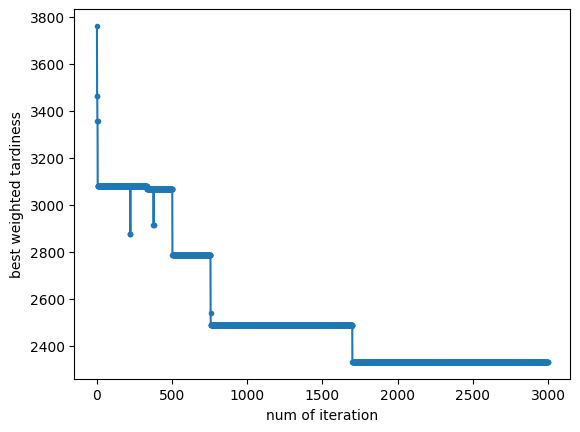

In [120]:
GA_job_shop(param_population_size=40, param_offspring_size=30, mutation_rate=0.1)

shape of population_list: (40, 20)
Iter #0 Best tardiness is 4183, the job sequence is [10, 9, 11, 3, 16, 12, 15, 8, 7, 0, 1, 5, 18, 6, 17, 4, 14, 13, 2, 19] (has_progress)
Iter #1 Best tardiness is 3727, the job sequence is [10, 11, 8, 15, 6, 17, 7, 9, 19, 12, 3, 0, 1, 4, 16, 2, 14, 13, 18, 5] (has_progress)
Iter #2 Best tardiness is 3263, the job sequence is [11, 19, 4, 3, 16, 12, 15, 8, 7, 13, 6, 9, 2, 0, 17, 5, 1, 10, 14, 18] (has_progress)
Iter #6 Best tardiness is 3247, the job sequence is [1, 11, 4, 3, 16, 12, 15, 8, 7, 13, 19, 9, 10, 6, 17, 0, 14, 2, 5, 18] (has_progress)
Iter #7 Best tardiness is 2974, the job sequence is [11, 10, 4, 3, 16, 12, 15, 8, 7, 13, 19, 6, 9, 17, 0, 1, 14, 2, 5, 18] (has_progress)
Iter #9 Best tardiness is 2909, the job sequence is [19, 11, 4, 3, 16, 12, 15, 8, 7, 13, 0, 9, 6, 1, 17, 5, 10, 2, 14, 18] (has_progress)
Iter #10 Best tardiness is 2459, the job sequence is [11, 10, 4, 3, 15, 16, 7, 8, 6, 13, 19, 12, 9, 17, 0, 1, 14, 2, 5, 18] (has_progress

(2327, [19, 11, 4, 3, 15, 16, 7, 8, 6, 13, 0, 9, 12, 1, 17, 5, 10, 2, 14, 18])

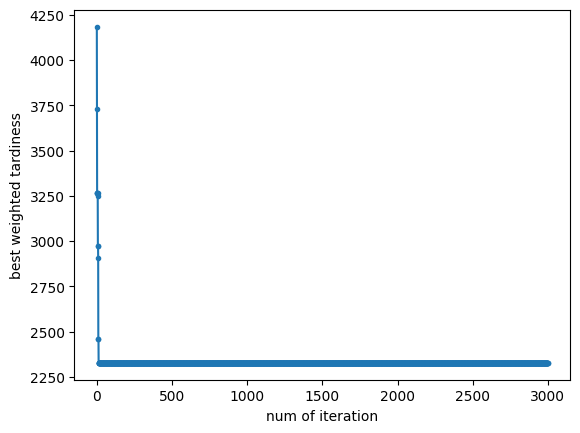

In [121]:
# 只提高 `mutation_rate = 0.2`
GA_job_shop(param_population_size=40, param_offspring_size=30, mutation_rate=0.2)

shape of population_list: (40, 20)
Iter #0 Best tardiness is 4210, the job sequence is [11, 13, 16, 3, 2, 9, 0, 7, 6, 12, 15, 10, 17, 1, 8, 5, 19, 4, 14, 18] (has_progress)
Iter #1 Best tardiness is 3130, the job sequence is [8, 11, 0, 16, 15, 9, 4, 7, 10, 17, 13, 1, 14, 5, 19, 3, 6, 2, 12, 18] (has_progress)
Iter #4 Best tardiness is 2787, the job sequence is [8, 11, 3, 16, 15, 9, 4, 7, 10, 17, 12, 0, 14, 5, 1, 13, 6, 2, 19, 18] (has_progress)
Iter #134 Best tardiness is 2712, the job sequence is [8, 11, 3, 16, 15, 9, 4, 7, 19, 17, 10, 0, 13, 2, 6, 12, 14, 1, 18, 5] (has_progress)
Iter #135 Best tardiness is 2657, the job sequence is [8, 11, 3, 16, 15, 9, 4, 7, 10, 17, 19, 0, 13, 2, 6, 12, 14, 1, 18, 5] (has_progress)
Iter #387 Best tardiness is 2585, the job sequence is [10, 11, 3, 16, 15, 8, 4, 7, 0, 12, 19, 17, 13, 2, 9, 1, 14, 5, 6, 18] (has_progress)
Iter #388 Best tardiness is 2522, the job sequence is [9, 11, 3, 16, 15, 8, 4, 7, 0, 17, 19, 10, 13, 2, 6, 12, 14, 1, 18, 5] (has_p

(2175, [11, 19, 3, 16, 15, 8, 4, 7, 0, 9, 13, 12, 6, 10, 1, 17, 14, 5, 18, 2])

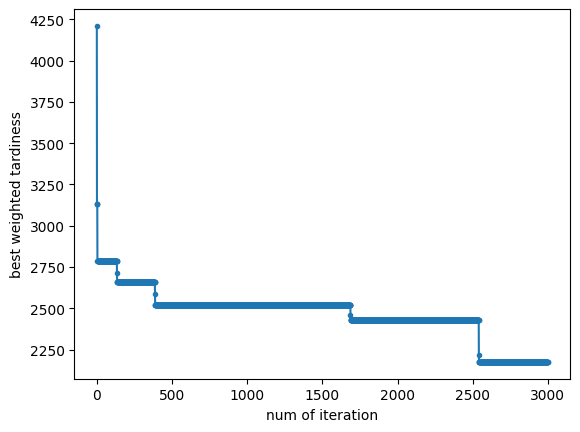

In [122]:
# 只提高 `offspring_size = 40`
GA_job_shop(param_population_size=40, param_offspring_size=40, mutation_rate=0.1)

shape of population_list: (80, 20)
Iter #0 Best tardiness is 4251, the job sequence is [3, 16, 4, 15, 17, 19, 18, 0, 5, 11, 6, 9, 12, 8, 1, 13, 10, 7, 2, 14] (has_progress)
Iter #1 Best tardiness is 4019, the job sequence is [11, 19, 4, 7, 6, 0, 8, 12, 17, 5, 16, 15, 10, 2, 1, 14, 9, 13, 3, 18] (has_progress)
Iter #2 Best tardiness is 3752, the job sequence is [8, 11, 5, 4, 16, 10, 14, 13, 15, 19, 0, 7, 9, 1, 6, 12, 2, 17, 18, 3] (has_progress)
Iter #3 Best tardiness is 2982, the job sequence is [3, 19, 4, 0, 15, 16, 7, 9, 10, 11, 6, 17, 12, 8, 1, 13, 5, 18, 2, 14] (has_progress)
Iter #6 Best tardiness is 2916, the job sequence is [3, 11, 5, 0, 15, 16, 7, 9, 10, 19, 6, 13, 4, 1, 8, 12, 2, 17, 18, 14] (has_progress)
Iter #7 Best tardiness is 2522, the job sequence is [3, 19, 4, 8, 11, 15, 7, 9, 10, 0, 6, 16, 12, 17, 1, 13, 5, 18, 2, 14] (has_progress)
Iter #1386 Best tardiness is 2200, the job sequence is [11, 8, 4, 3, 9, 15, 7, 16, 10, 0, 6, 12, 17, 5, 19, 13, 1, 18, 2, 14] (has_progre

(2200, [11, 8, 4, 3, 9, 15, 7, 16, 10, 0, 6, 12, 17, 5, 19, 13, 1, 18, 2, 14])

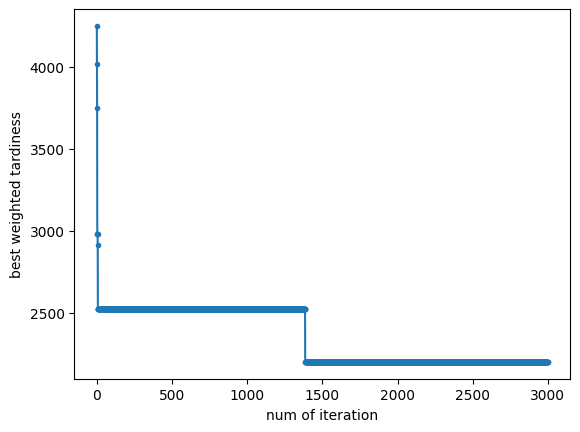

In [123]:
# 只提高 `population_size = 80`
GA_job_shop(param_population_size=80, param_offspring_size=30, mutation_rate=0.1)

shape of population_list: (80, 20)
Iter #0 Best tardiness is 3143, the job sequence is [11, 16, 0, 3, 19, 15, 8, 7, 13, 12, 10, 5, 4, 1, 2, 9, 17, 14, 18, 6] (has_progress)
Iter #3 Best tardiness is 2788, the job sequence is [11, 16, 0, 3, 15, 1, 4, 7, 8, 12, 10, 5, 13, 19, 2, 9, 17, 14, 18, 6] (has_progress)
Iter #165 Best tardiness is 2745, the job sequence is [11, 15, 9, 3, 19, 16, 4, 7, 0, 12, 1, 5, 10, 8, 13, 2, 17, 14, 18, 6] (has_progress)
Iter #205 Best tardiness is 2213, the job sequence is [16, 11, 3, 15, 19, 8, 4, 7, 0, 6, 1, 12, 10, 5, 13, 9, 17, 14, 18, 2] (has_progress)
Iter #1156 Best tardiness is 2183, the job sequence is [16, 11, 9, 15, 4, 3, 7, 1, 0, 6, 8, 19, 10, 12, 13, 17, 5, 14, 18, 2] (has_progress)
Iter #1157 Best tardiness is 2143, the job sequence is [16, 11, 8, 15, 4, 3, 7, 1, 0, 6, 19, 12, 10, 5, 13, 9, 17, 14, 18, 2] (has_progress)
total_time: 17.65 seconds.


(2143, [16, 11, 8, 15, 4, 3, 7, 1, 0, 6, 19, 12, 10, 5, 13, 9, 17, 14, 18, 2])

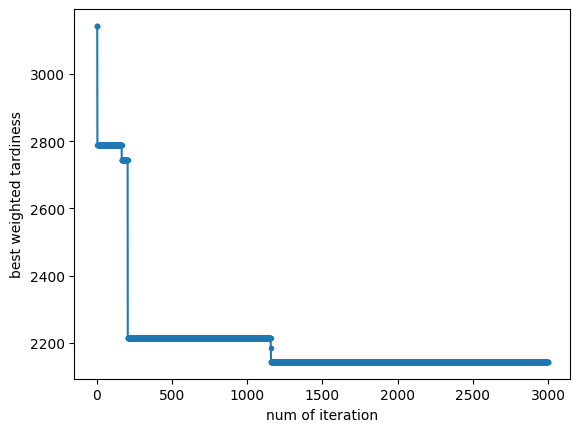

In [124]:
# 三個參數一起調高
GA_job_shop(param_population_size=80, param_offspring_size=40, mutation_rate=0.2)

In [ ]:
# 有點 bug 的方法 直接改 numpy 重寫

# def PMX_crossover(parent1:list, parent2:list, debug_print=False):
#     assert len(parent1) == len(parent2)
#     lenx = len(parent1)
#     # 決定保留的起點 終點
#     cutoff_1, cutoff_2 = sorted(random.sample(list(range(lenx)), 2))
#     cutoff_1, cutoff_2 = 2, 7
#     print('cutoff_1, cutoff_2:', cutoff_1, cutoff_2)

#     def PMX_one_offspring(p1, p2):
#         lenx = len(p1)
#         offspring = np.zeros(lenx)

#         # copy the mapping section (middle) from parent1
#         offspring[cutoff_1:cutoff_2] = p1[cutoff_1:cutoff_2] 
#         print('---\np1:', p1,', p2:', p2)
#         print('elements copied from parent p1:', offspring)

#         # copy the rest from parent2 (provide the elem of not used)
#         used_set = set(offspring[cutoff_1:cutoff_2])
#         print("used set is", used_set)
#         id_to_insert = list(range(cutoff_1)) + list(range(cutoff_2, lenx))
#         for i in id_to_insert:
#             candidate = p2[i]
#             if candidate in used_set:
#                 print(f'candidate {candidate} is not allowed', end=' ')
#                 # idx = p1.index(candidate)
#                 candidate = p2[candidate]
#                 print(f'at position {i}, will be replaced by {candidate}. (p2[{candidate}])')
#             offspring[i] = candidate
#         print('generate offspring:', offspring)
#         return offspring
    
#     # print('# makeing offspring1')
#     offspring1 = PMX_one_offspring(parent1, parent2)
#     # print('# makeing offspring2')
#     offspring2 = PMX_one_offspring(parent2, parent1)
#     # print('offspring1', offspring1)
#     # print('offspring2', offspring2)

#     offspring1 = offspring1.astype(int).tolist()
#     offspring2 = offspring2.astype(int).tolist()
#     sequence_integrity_test(offspring1)
#     sequence_integrity_test(offspring2)
#     return offspring1, offspring2

# # unit test
# PMX_crossover([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], [7,8,9,0,1,2,3,4,5,6,10,11,12,13,14,15], debug_print=True)
